# E-tivity 3: : Linear Regression

## Student Name: Garret Molloy
## Student ID: 9021906

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split

# Task 4  (CE6002)
- Copy your linear classification algorithm to the notebook
- Change your linear classification algorithm to make it suitable for linear regression
- Use this to obtain the best possible fit to the data set Task4.csv
- Your regression performance should improve if you add some new features
- Also, use an algorithm from the scikit-learn toolbox to see if you can do better
- You should not add any other imports than those necessary for your chosen scikit-learn algorithm.


In [2]:
# Read in data file
df = pd.read_csv('Task4.csv')

In [3]:
df.shape

(100, 2)

In [4]:
df.head()

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927


In [5]:
X = np.array(df['X'].values, dtype=float)
y = np.array(df['y'].values, dtype=float)

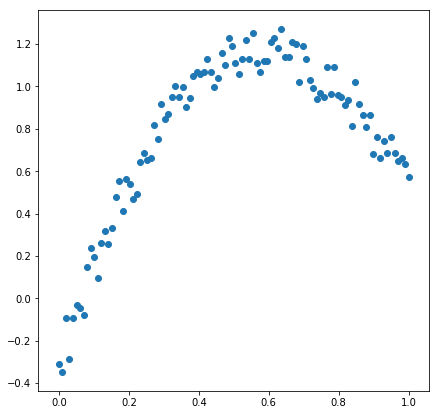

In [6]:
fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X,y)
plt.show()

#### Bring in Methods from Linear Classification
Add new method for Linear Regression (remove sign() )

In [7]:
def linear_classification(x,w):
    #Linear Classificaion is the sign of the dot product of weights(transposed) and input vector eights
    # its sgn determines the class allocation
    return np.sign(w.T.dot(x))

In [8]:
# Changing Classificaiton to Regression Predict Value
def linear_regression_predict(x,w):
    #print("X:", x.shape,"w:", w.shape, "Result=Wt.X")
    #Linear Classificaion is the sign of the dot product of weights(transposed) and input vector eights
    # its sgn determines the class allocation
    return (w.T.dot(x))



In [9]:
# Homemade Linear Regression from scratch (didn't think I could do it!!
from numpy.linalg import inv

def linear_regression(X, y):
    # X dagger = Psuedo Inverse =        (Xt * X)^-1 * Xt
    psuedo_inverse = np.matmul(inv(np.matmul(X.T, X)), X.T)    # Yaay! one line!!
    # return w = X dagger * Xt
    return np.matmul(psuedo_inverse, y) # return w

In [10]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [37]:
def calc_error_RMSE(predicted, actual):
    # Function to calculate the Mean squared error
    # Sum of (h(xn) - yn)**2 for all N samples / N
    sum = 0
    for hx, y in zip(predicted, actual):
        sum += ((hx - y)**2)
        # print(hx,y,((hx - y)**2),sum)
    #print("samples:", predicted.shape[0])
    mse = sum / predicted.shape[0]
    rmse = math.sqrt(mse)
    print("RMSE Error: {:0.3f}".format(rmse))
    return #rmse

In [38]:
# Add Bias to input features
shape = X.shape
new_X = np.ones((shape[0],2))
new_X[:,1] = X

In [39]:
# Split the data in to train and test (80/20 split) and ensure the data is shuffled.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2, shuffle=True, random_state=42)

In [40]:
X_train.shape

(80, 2)

In [41]:
y_train.shape

(80,)

In [42]:
X_test.shape

(20, 2)

In [43]:
weights = linear_regression(X_train, y_train)

In [44]:
weights

array([0.42876122, 0.72390652])

   ## Plot Features & Predicited Values from My Logistic Regression

In [45]:
# We want to plot in red the predictions are linear regression would provide for the test data
y_predict = np.asarray([linear_regression_predict(x, weights) for x in X_test] )

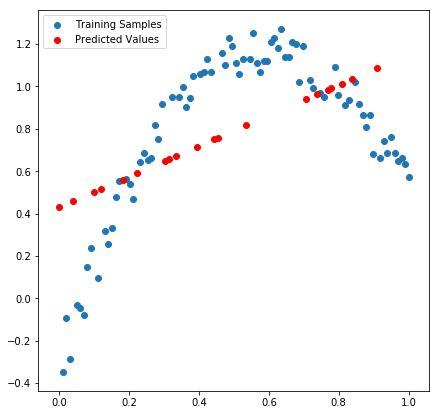

In [46]:
fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X_train[:,1],y_train[:], label="Training Samples")
plt.scatter(X_test[:,1],y_predict, color='r', label='Predicted Values')
plt.legend()
plt.show()

Not a great match, even if I do not look at the vizualization but check the Eout Scores:
    

In [47]:
calc_error_RMSE(y_predict, y_test)

RMSE Error: 0.306


## Add new Features x<sup>2</sup>

In [48]:
# Here I am adding new features to the above
X_train_transformed = np.asarray([(bias, x1, x1**2) for (bias, x1) in X_train])
X_test_transformed  = np.asarray([(bias, x1, x1**2) for (bias, x1) in X_test])

In [49]:
weights2 = linear_regression(X_train_transformed, y_train)

In [50]:
weights2

array([-0.28548779,  4.89446178, -4.09325841])

In [51]:
y_predict2 = np.asarray([linear_regression_predict(x, weights2) for x in X_test_transformed] )


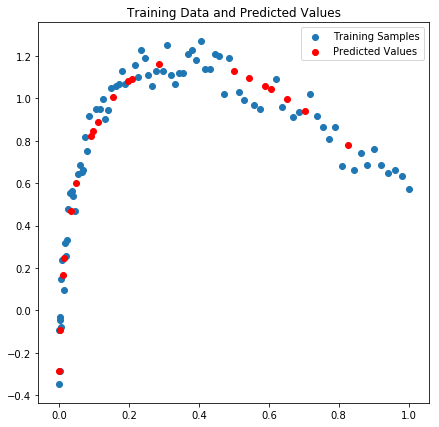

In [52]:
fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X_train_transformed[:,2],y_train[:], label="Training Samples")
plt.scatter(X_test_transformed[:,2],y_predict2, color='r', label='Predicted Values')
plt.title("Training Data and Predicted Values")
plt.legend()
plt.show()

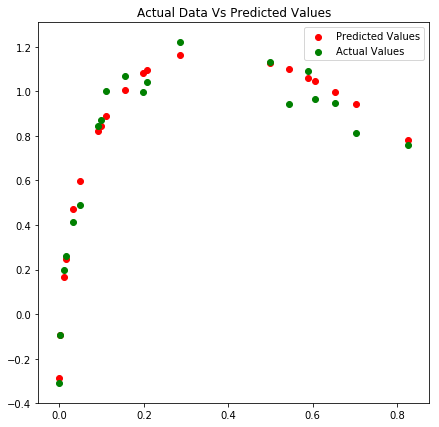

In [53]:
fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X_test_transformed[:,2],y_predict2, color='r', label='Predicted Values')
plt.scatter(X_test_transformed[:,2],y_test, color='g', label='Actual Values')
plt.title("Actual Data Vs Predicted Values")

plt.legend()
plt.show()

In [54]:
calc_error_RMSE(y_predict2, y_test)

RMSE Error: 0.070


Looks Good
## Add Fatures x<sup>3</sup>

In [55]:
# Here I am adding new features to the above
X_train_transformed2 = np.asarray([(bias, x1, x1**2, x1**3) for (bias, x1) in X_train])
X_test_transformed2  = np.asarray([(bias, x1, x1**2, x1**3) for (bias, x1) in X_test])

In [56]:
weights3 = linear_regression(X_train_transformed2, y_train)

In [57]:
y_predict3 = np.asarray([linear_regression_predict(x, weights3) for x in X_test_transformed2] )


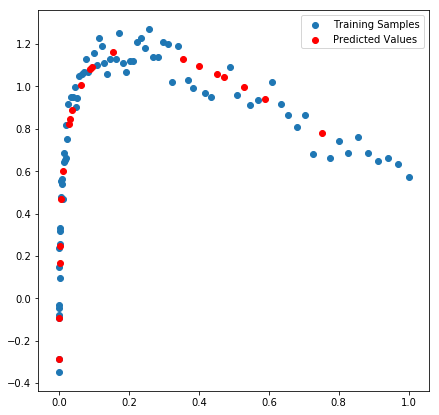

In [58]:
fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X_train_transformed2[:,3],y_train[:], label="Training Samples")
plt.scatter(X_test_transformed2[:,3],y_predict2, color='r', label='Predicted Values')
plt.legend()
plt.show()

In [59]:
calc_error_RMSE(y_predict3, y_test)

RMSE Error: 0.068
